# 程序说明
时间：2016年11月16日

说明：该程序是一个包含两个隐藏层的神经网络，程序会保存每轮训练的acc和loss，并且绘制它们。

数据集：MNIST

## 1.加载keras模块

In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### 写一个LossHistory类，保存loss和acc

In [3]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
        
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
        
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

## 2.变量初始化

In [4]:
batch_size = 128 
nb_classes = 10
nb_epoch = 20

## 3.准备数据

In [5]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### 转换类标号

In [6]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## 4.建立模型
### 使用Sequential（）

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

### 打印模型

In [8]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 512)           401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 512)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 512)           0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 512)           262656      dropout_1[0][0]                  
___________________________________________________________________________________________

## 5.训练与评估
### 编译模型

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### 创建一个实例history

In [10]:
history = LossHistory()

### 迭代训练（注意这个地方要加入callbacks）

In [11]:
model.fit(X_train, Y_train,
            batch_size=batch_size, nb_epoch=nb_epoch,
            verbose=1, 
            validation_data=(X_test, Y_test),
            callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s - loss: 0.2448 - acc: 0.9239 - val_loss: 0.1220 - val_acc: 0.9623
Epoch 2/20
60000/60000 [==============================] - 5s - loss: 0.1025 - acc: 0.9689 - val_loss: 0.0775 - val_acc: 0.9760
Epoch 3/20
60000/60000 [==============================] - 5s - loss: 0.0752 - acc: 0.9773 - val_loss: 0.0792 - val_acc: 0.9775
Epoch 4/20
60000/60000 [==============================] - 5s - loss: 0.0608 - acc: 0.9819 - val_loss: 0.0758 - val_acc: 0.9790
Epoch 5/20
60000/60000 [==============================] - 5s - loss: 0.0500 - acc: 0.9852 - val_loss: 0.0903 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 5s - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0780 - val_acc: 0.9798
Epoch 7/20
60000/60000 [==============================] - 5s - loss: 0.0398 - acc: 0.9875 - val_loss: 0.0798 - val_acc: 0.9823
Epoch 8/20
60000/60000 [==============================] - 5s 

### 模型评估

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.117298825225
Test accuracy: 0.9831


### 绘制acc-loss曲线

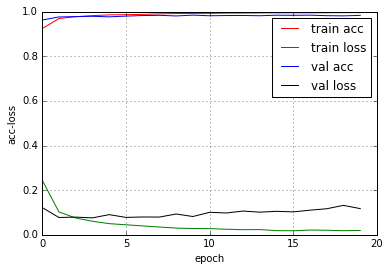

In [13]:
history.loss_plot('epoch')